In [ ]:
import pandas as pd

In [ ]:
nonphos_path = "/content/drive/MyDrive/Datasets/Capstone Dataset/ELM_NonPhos_Homo sapiens_37.csv"
phos_path = "/content/drive/MyDrive/Datasets/Capstone Dataset/ELM_Phos_Homo sapiens_37.csv"

In [ ]:
df1 =  pd.read_csv(nonphos_path)
df2 = pd.read_csv(phos_path)

In [ ]:
df = pd.concat([df1, df2], ignore_index=True)

In [ ]:
df = df.drop(['id','Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'], axis=1)

In [ ]:
df.columns

Index(['seq', 'Label'], dtype='object')

In [ ]:
df['seq'][0]

'NNNNNNNNNNNNNNNNMVTHSKFPAAGMSRPLDTSLR'

In [ ]:
len(df['seq'][0])

37

In [ ]:
def extract_middle_window(sequence, window_size):
    seq_len = len(sequence)
    if window_size > seq_len:
        raise ValueError("Window size is larger than the sequence length")

    start_index = (seq_len - window_size) // 2 + 1
    end_index = start_index + window_size
    return sequence[start_index:end_index]

def apply_window_to_dataframe(df, window_size):
    df['middle_window'] = df['seq'].apply(lambda x: extract_middle_window(x, window_size))
    return df

In [ ]:

# Apply the function with window size 7
window_size = 15
df = apply_window_to_dataframe(df, window_size)


In [ ]:
df.head(5)

,seq,Label,middle_window
0,NNNNNNNNNNNNNNNNMVTHSKFPAAGMSRPLDTSLR,0,NNNNMVTHSKFPAAG
1,NNNNNNMVTHSKFPAAGMSRPLDTSLRLKTFSSKSEY,0,FPAAGMSRPLDTSLR
2,MVTHSKFPAAGMSRPLDTSLRLKTFSSKSEYQLVVNA,0,SRPLDTSLRLKTFSS
3,AAGMSRPLDTSLRLKTFSSKSEYQLVVNAVRKLQESG,0,RLKTFSSKSEYQLVV
4,GMSRPLDTSLRLKTFSSKSEYQLVVNAVRKLQESGFY,0,KTFSSKSEYQLVVNA


In [ ]:
df.tail(5)

,seq,Label,middle_window
8660,RRGQFYDNKGITYLFDLDYESDEFTVDAARYGNVSHF,1,YLFDLDYESDEFTVD
8661,DELLYKPDSNEFAVGTKNYSVSAGDPPVTVMSLVETV,1,AVGTKNYSVSAGDPP
8662,YDSDRSYPLDLEGGSEYKYTPPTQPPISPPYQEACTL,1,GGSEYKYTPPTQPPI
8663,NNNNNMAGKKNVLSSLAVYAEDSEPESDGEAGIEAVG,1,LSSLAVYAEDSEPES
8664,LDKKQRNFDKVLAEWKQKYEETQAELEASQKESRSLS,1,AEWKQKYEETQAELE


#Window size 7

In [ ]:
import pandas as pd
import numpy as np
from itertools import product
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

# Load your dataset into a DataFrame (replace 'your_dataset.csv' with your actual dataset file)
X = df['middle_window']
y = df['Label']

# Define the function to compute DPC features
def compute_dpc(sequence):
    sequence = sequence.replace('^', '')  # Remove any special characters if present
    amino_acids = 'ARNDCQEGHILKMFPSTWYV'
    dipeptides = [''.join(pair) for pair in product(amino_acids, repeat=2)]
    dpc_counts = Counter([sequence[i:i+2] for i in range(len(sequence)-1)])
    dpc_vector = [dpc_counts[dipeptide] for dipeptide in dipeptides]
    return dpc_vector

# Compute DPC features and store them in a new column 'DPC'
df['DPC'] = df['seq'].apply(compute_dpc)

# Convert 'DPC' column to numpy array
X = np.array(df['DPC'].tolist())
y = df['Label']  # Replace 'Label' with your target variable column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Initialize and train an AdaBoostClassifier
ada_boost_classifier = AdaBoostClassifier()
ada_boost_classifier.fit(X_train, y_train)

ada_boost_pred = ada_boost_classifier.predict(X_test)

ada_boost_accuracy = accuracy_score(y_test, ada_boost_pred)

print(f"AdaBoost Accuracy: {ada_boost_accuracy}")

AdaBoost Accuracy: 0.693594922100404


In [ ]:
# Initialize and train a GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

gb_pred = gb_classifier.predict(X_test)

gb_accuracy = accuracy_score(y_test, gb_pred)

print(f"Gradient Boosting Classifier Accuracy: {gb_accuracy}")

Gradient Boosting Classifier Accuracy: 0.7166762839007501


In [ ]:
# Initialize and train an ExtraTreesClassifier
extra_trees_classifier = ExtraTreesClassifier()
extra_trees_classifier.fit(X_train, y_train)

extra_trees_pred = extra_trees_classifier.predict(X_test)

extra_trees_accuracy = accuracy_score(y_test, extra_trees_pred)

print(f"Extra Trees Classifier Accuracy: {extra_trees_accuracy}")



Extra Trees Classifier Accuracy: 0.8303519907674553


In [ ]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(extra_trees_classifier, f)


In [ ]:
# Installation
!pip install lazypredict


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 5.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [ ]:
# Imports
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import datasets

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# Fit all models
clf = LazyClassifier(predictions=True)
X_trains, X_tests, y_trains, y_tests = train_test_split(X, y, test_size=0.10, random_state=42)
models, predictions = clf.fit(X_trains, X_test, y_trains, y_test)
models

 97%|█████████▋| 28/29 [01:29<00:04,  4.40s/it]

[LightGBM] [Info] Number of positive: 3789, number of negative: 4009
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029610 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1959
[LightGBM] [Info] Number of data points in the train set: 7798, number of used features: 400
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.485894 -> initscore=-0.056440
[LightGBM] [Info] Start training from score -0.056440


100%|██████████| 29/29 [01:30<00:00,  3.10s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.93,0.93,0.93,0.93,5.04
RandomForestClassifier,0.92,0.92,0.92,0.92,2.61
NuSVC,0.91,0.91,0.91,0.91,22.82
SVC,0.89,0.89,0.89,0.89,18.41
BaggingClassifier,0.88,0.88,0.88,0.88,3.27
XGBClassifier,0.88,0.87,0.87,0.88,3.31
DecisionTreeClassifier,0.86,0.86,0.86,0.86,0.55
ExtraTreeClassifier,0.85,0.85,0.85,0.85,0.16
LGBMClassifier,0.84,0.84,0.84,0.84,0.86


from matplotlib import pyplot as plt
models['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
models['Balanced Accuracy'].plot(kind='hist', bins=20, title='Balanced Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
models['ROC AUC'].plot(kind='hist', bins=20, title='ROC AUC')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
models['F1 Score'].plot(kind='hist', bins=20, title='F1 Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
models.plot(kind='scatter', x='Accuracy', y='Balanced Accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
models.plot(kind='scatter', x='Balanced Accuracy', y='ROC AUC', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
models.plot(kind='scatter', x='ROC AUC', y='F1 Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
models.plot(kind='scatter', x='F1 Score', y='Time Taken', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time Taken']
  ys = series['Accuracy']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = models.sort_values('Time Taken', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time Taken')
_ = plt.ylabel('Accuracy')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time Taken']
  ys = series['Balanced Accuracy']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = models.sort_values('Time Taken', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time Taken')
_ = plt.ylabel('Balanced Accuracy')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time Taken']
  ys = series['ROC AUC']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = models.sort_values('Time Taken', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time Taken')
_ = plt.ylabel('ROC AUC')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time Taken']
  ys = series['F1 Score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = models.sort_values('Time Taken', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time Taken')
_ = plt.ylabel('F1 Score')

from matplotlib import pyplot as plt
models['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
models['Balanced Accuracy'].plot(kind='line', figsize=(8, 4), title='Balanced Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
models['ROC AUC'].plot(kind='line', figsize=(8, 4), title='ROC AUC')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
models['F1 Score'].plot(kind='line', figsize=(8, 4), title='F1 Score')
plt.gca().spines[['top', 'right']].set_visible(False)

(array([-5.,  0.,  5., 10., 15., 20., 25., 30.]),
 [Text(-5.0, 0, 'GaussianNB'),
  Text(0.0, 0, 'ExtraTreesClassifier'),
  Text(5.0, 0, 'XGBClassifier'),
  Text(10.0, 0, 'QuadraticDiscriminantAnalysis'),
  Text(15.0, 0, 'RidgeClassifier'),
  Text(20.0, 0, 'BernoulliNB'),
  Text(25.0, 0, 'Perceptron'),
  Text(30.0, 0, '')])

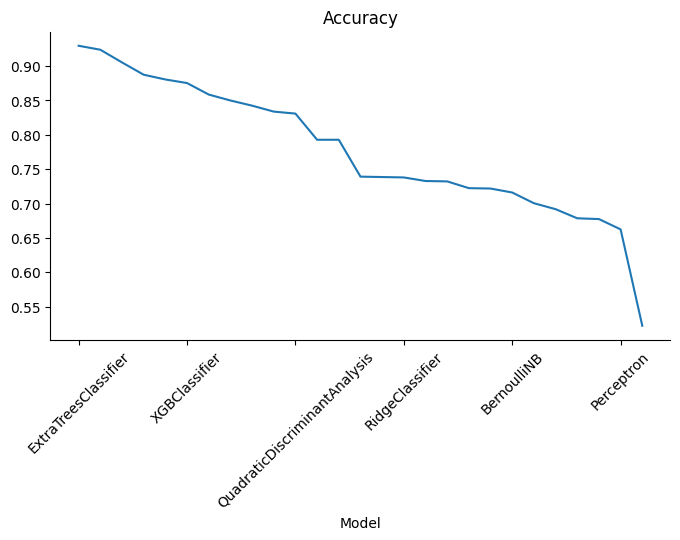

In [ ]:
from matplotlib import pyplot as plt
models['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xticks(rotation=45)

#Window Size 11

In [ ]:
import pandas as pd
import numpy as np
from itertools import product
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df1 =  pd.read_csv(nonphos_path)
df2 = pd.read_csv(phos_path)

df = pd.concat([df1, df2], ignore_index=True)

df = df.drop(['id','Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'], axis=1)

# Apply the function with window size 7
window_size = 11
df = apply_window_to_dataframe(df, window_size)



# Load your dataset into a DataFrame (replace 'your_dataset.csv' with your actual dataset file)
X = df['middle_window']
y = df['Label']

# Define the function to compute DPC features
def compute_dpc(sequence):
    sequence = sequence.replace('^', '')  # Remove any special characters if present
    amino_acids = 'ARNDCQEGHILKMFPSTWYV'
    dipeptides = [''.join(pair) for pair in product(amino_acids, repeat=2)]
    dpc_counts = Counter([sequence[i:i+2] for i in range(len(sequence)-1)])
    dpc_vector = [dpc_counts[dipeptide] for dipeptide in dipeptides]
    return dpc_vector

# Compute DPC features and store them in a new column 'DPC'
df['DPC'] = df['seq'].apply(compute_dpc)

# Convert 'DPC' column to numpy array
X = np.array(df['DPC'].tolist())
y = df['Label']  # Replace 'Label' with your target variable column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit all models
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

 97%|█████████▋| 28/29 [02:26<00:04,  4.06s/it]

[LightGBM] [Info] Number of positive: 3356, number of negative: 3576
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027024 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1946
[LightGBM] [Info] Number of data points in the train set: 6932, number of used features: 400
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.484132 -> initscore=-0.063495
[LightGBM] [Info] Start training from score -0.063495


100%|██████████| 29/29 [02:27<00:00,  5.08s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.83,0.83,0.83,0.83,5.44
RandomForestClassifier,0.82,0.82,0.82,0.82,2.21
NuSVC,0.82,0.82,0.82,0.82,24.33
SVC,0.80,0.80,0.80,0.80,19.46
KNeighborsClassifier,0.78,0.78,0.78,0.78,0.86
XGBClassifier,0.78,0.78,0.78,0.78,1.08
LGBMClassifier,0.78,0.78,0.78,0.78,0.77
BaggingClassifier,0.77,0.77,0.77,0.77,3.60
QuadraticDiscriminantAnalysis,0.75,0.75,0.75,0.75,0.75


from matplotlib import pyplot as plt
_df_16['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Balanced Accuracy'].plot(kind='hist', bins=20, title='Balanced Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['ROC AUC'].plot(kind='hist', bins=20, title='ROC AUC')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['F1 Score'].plot(kind='hist', bins=20, title='F1 Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='Accuracy', y='Balanced Accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='Balanced Accuracy', y='ROC AUC', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='ROC AUC', y='F1 Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='F1 Score', y='Time Taken', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time Taken']
  ys = series['Accuracy']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('Time Taken', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time Taken')
_ = plt.ylabel('Accuracy')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time Taken']
  ys = series['Balanced Accuracy']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('Time Taken', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time Taken')
_ = plt.ylabel('Balanced Accuracy')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time Taken']
  ys = series['ROC AUC']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values('Time Taken', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time Taken')
_ = plt.ylabel('ROC AUC')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time Taken']
  ys = series['F1 Score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_27.sort_values('Time Taken', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time Taken')
_ = plt.ylabel('F1 Score')

from matplotlib import pyplot as plt
_df_28['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_29['Balanced Accuracy'].plot(kind='line', figsize=(8, 4), title='Balanced Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_30['ROC AUC'].plot(kind='line', figsize=(8, 4), title='ROC AUC')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_31['F1 Score'].plot(kind='line', figsize=(8, 4), title='F1 Score')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df1 =  pd.read_csv(nonphos_path)
df2 = pd.read_csv(phos_path)

df = pd.concat([df1, df2], ignore_index=True)

df = df.drop(['id','Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'], axis=1)

# Apply the function with window size 7
window_size = 13
df = apply_window_to_dataframe(df, window_size)



# Load your dataset into a DataFrame (replace 'your_dataset.csv' with your actual dataset file)
X = df['middle_window']
y = df['Label']

# Define the function to compute DPC features
def compute_dpc(sequence):
    sequence = sequence.replace('^', '')  # Remove any special characters if present
    amino_acids = 'ARNDCQEGHILKMFPSTWYV'
    dipeptides = [''.join(pair) for pair in product(amino_acids, repeat=2)]
    dpc_counts = Counter([sequence[i:i+2] for i in range(len(sequence)-1)])
    dpc_vector = [dpc_counts[dipeptide] for dipeptide in dipeptides]
    return dpc_vector

# Compute DPC features and store them in a new column 'DPC'
df['DPC'] = df['seq'].apply(compute_dpc)

# Convert 'DPC' column to numpy array
X = np.array(df['DPC'].tolist())
y = df['Label']  # Replace 'Label' with your target variable column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit all models
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

 97%|█████████▋| 28/29 [02:05<00:03,  3.94s/it]

[LightGBM] [Info] Number of positive: 3356, number of negative: 3576
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026452 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1946
[LightGBM] [Info] Number of data points in the train set: 6932, number of used features: 400
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.484132 -> initscore=-0.063495
[LightGBM] [Info] Start training from score -0.063495


100%|██████████| 29/29 [02:06<00:00,  4.35s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.83,0.83,0.83,0.83,3.81
RandomForestClassifier,0.82,0.82,0.82,0.82,2.20
NuSVC,0.82,0.82,0.82,0.82,20.90
SVC,0.80,0.80,0.80,0.80,18.63
KNeighborsClassifier,0.78,0.78,0.78,0.78,0.57
XGBClassifier,0.78,0.78,0.78,0.78,0.90
LGBMClassifier,0.78,0.78,0.78,0.78,0.77
BaggingClassifier,0.77,0.77,0.77,0.77,2.62
QuadraticDiscriminantAnalysis,0.75,0.75,0.75,0.75,0.74


#Window Size 15

In [ ]:
df1 =  pd.read_csv(nonphos_path)
df2 = pd.read_csv(phos_path)

df = pd.concat([df1, df2], ignore_index=True)

df = df.drop(['id','Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'], axis=1)

# Apply the function with window size 7
window_size = 15
df = apply_window_to_dataframe(df, window_size)



# Load your dataset into a DataFrame (replace 'your_dataset.csv' with your actual dataset file)
X = df['middle_window']
y = df['Label']

# Define the function to compute DPC features
def compute_dpc(sequence):
    sequence = sequence.replace('^', '')  # Remove any special characters if present
    amino_acids = 'ARNDCQEGHILKMFPSTWYV'
    dipeptides = [''.join(pair) for pair in product(amino_acids, repeat=2)]
    dpc_counts = Counter([sequence[i:i+2] for i in range(len(sequence)-1)])
    dpc_vector = [dpc_counts[dipeptide] for dipeptide in dipeptides]
    return dpc_vector

# Compute DPC features and store them in a new column 'DPC'
df['DPC'] = df['seq'].apply(compute_dpc)

# Convert 'DPC' column to numpy array
X = np.array(df['DPC'].tolist())
y = df['Label']  # Replace 'Label' with your target variable column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit all models
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

NameError: name 'LazyClassifier' is not defined

#Window Size 17

In [ ]:
df1 =  pd.read_csv(nonphos_path)
df2 = pd.read_csv(phos_path)

df = pd.concat([df1, df2], ignore_index=True)

df = df.drop(['id','Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'], axis=1)

# Apply the function with window size 7
window_size = 17
df = apply_window_to_dataframe(df, window_size)



# Load your dataset into a DataFrame (replace 'your_dataset.csv' with your actual dataset file)
X = df['middle_window']
y = df['Label']

# Define the function to compute DPC features
def compute_dpc(sequence):
    sequence = sequence.replace('^', '')  # Remove any special characters if present
    amino_acids = 'ARNDCQEGHILKMFPSTWYV'
    dipeptides = [''.join(pair) for pair in product(amino_acids, repeat=2)]
    dpc_counts = Counter([sequence[i:i+2] for i in range(len(sequence)-1)])
    dpc_vector = [dpc_counts[dipeptide] for dipeptide in dipeptides]
    return dpc_vector

# Compute DPC features and store them in a new column 'DPC'
df['DPC'] = df['seq'].apply(compute_dpc)

# Convert 'DPC' column to numpy array
X = np.array(df['DPC'].tolist())
y = df['Label']  # Replace 'Label' with your target variable column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit all models
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

 97%|█████████▋| 28/29 [02:08<00:04,  4.25s/it]

[LightGBM] [Info] Number of positive: 3356, number of negative: 3576
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.063449 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1946
[LightGBM] [Info] Number of data points in the train set: 6932, number of used features: 400
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.484132 -> initscore=-0.063495
[LightGBM] [Info] Start training from score -0.063495


100%|██████████| 29/29 [02:09<00:00,  4.48s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.83,0.83,0.83,0.83,5.43
RandomForestClassifier,0.82,0.82,0.82,0.82,2.21
NuSVC,0.82,0.82,0.82,0.82,23.36
SVC,0.80,0.80,0.80,0.80,18.81
KNeighborsClassifier,0.78,0.78,0.78,0.78,1.36
XGBClassifier,0.78,0.78,0.78,0.78,2.49
LGBMClassifier,0.78,0.78,0.78,0.78,1.21
BaggingClassifier,0.77,0.77,0.77,0.77,2.60
QuadraticDiscriminantAnalysis,0.75,0.75,0.75,0.75,0.75


#Window Size 19

In [ ]:
df1 =  pd.read_csv(nonphos_path)
df2 = pd.read_csv(phos_path)

df = pd.concat([df1, df2], ignore_index=True)

df = df.drop(['id','Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'], axis=1)

# Apply the function with window size 7
window_size = 19
df = apply_window_to_dataframe(df, window_size)



# Load your dataset into a DataFrame (replace 'your_dataset.csv' with your actual dataset file)
X = df['middle_window']
y = df['Label']

# Define the function to compute DPC features
def compute_dpc(sequence):
    sequence = sequence.replace('^', '')  # Remove any special characters if present
    amino_acids = 'ARNDCQEGHILKMFPSTWYV'
    dipeptides = [''.join(pair) for pair in product(amino_acids, repeat=2)]
    dpc_counts = Counter([sequence[i:i+2] for i in range(len(sequence)-1)])
    dpc_vector = [dpc_counts[dipeptide] for dipeptide in dipeptides]
    return dpc_vector

# Compute DPC features and store them in a new column 'DPC'
df['DPC'] = df['seq'].apply(compute_dpc)

# Convert 'DPC' column to numpy array
X = np.array(df['DPC'].tolist())
y = df['Label']  # Replace 'Label' with your target variable column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit all models
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

 97%|█████████▋| 28/29 [02:06<00:03,  3.86s/it]

[LightGBM] [Info] Number of positive: 3356, number of negative: 3576
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047885 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1946
[LightGBM] [Info] Number of data points in the train set: 6932, number of used features: 400
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.484132 -> initscore=-0.063495
[LightGBM] [Info] Start training from score -0.063495


100%|██████████| 29/29 [02:07<00:00,  4.39s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.83,0.83,0.83,0.83,3.01
RandomForestClassifier,0.82,0.82,0.82,0.82,2.20
NuSVC,0.82,0.82,0.82,0.82,22.55
SVC,0.80,0.80,0.80,0.80,18.66
KNeighborsClassifier,0.78,0.78,0.78,0.78,0.59
XGBClassifier,0.78,0.78,0.78,0.78,0.88
LGBMClassifier,0.78,0.78,0.78,0.78,1.14
BaggingClassifier,0.77,0.77,0.77,0.77,2.61
QuadraticDiscriminantAnalysis,0.75,0.75,0.75,0.75,1.10


#Window Size 19

In [ ]:
df1 =  pd.read_csv(nonphos_path)
df2 = pd.read_csv(phos_path)

df = pd.concat([df1, df2], ignore_index=True)

df = df.drop(['id','Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'], axis=1)

# Apply the function with window size 7
window_size = 21
df = apply_window_to_dataframe(df, window_size)



# Load your dataset into a DataFrame (replace 'your_dataset.csv' with your actual dataset file)
X = df['middle_window']
y = df['Label']

# Define the function to compute DPC features
def compute_dpc(sequence):
    sequence = sequence.replace('^', '')  # Remove any special characters if present
    amino_acids = 'ARNDCQEGHILKMFPSTWYV'
    dipeptides = [''.join(pair) for pair in product(amino_acids, repeat=2)]
    dpc_counts = Counter([sequence[i:i+2] for i in range(len(sequence)-1)])
    dpc_vector = [dpc_counts[dipeptide] for dipeptide in dipeptides]
    return dpc_vector

# Compute DPC features and store them in a new column 'DPC'
df['DPC'] = df['seq'].apply(compute_dpc)

# Convert 'DPC' column to numpy array
X = np.array(df['DPC'].tolist())
y = df['Label']  # Replace 'Label' with your target variable column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit all models
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

 97%|█████████▋| 28/29 [02:08<00:03,  3.98s/it]

[LightGBM] [Info] Number of positive: 3356, number of negative: 3576
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1946
[LightGBM] [Info] Number of data points in the train set: 6932, number of used features: 400
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.484132 -> initscore=-0.063495
[LightGBM] [Info] Start training from score -0.063495


100%|██████████| 29/29 [02:09<00:00,  4.46s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.83,0.83,0.83,0.83,3.14
RandomForestClassifier,0.82,0.82,0.82,0.82,3.39
NuSVC,0.82,0.82,0.82,0.82,22.39
SVC,0.80,0.80,0.80,0.80,19.02
KNeighborsClassifier,0.78,0.78,0.78,0.78,0.59
XGBClassifier,0.78,0.78,0.78,0.78,0.88
LGBMClassifier,0.78,0.78,0.78,0.78,0.76
BaggingClassifier,0.77,0.77,0.77,0.77,2.64
QuadraticDiscriminantAnalysis,0.75,0.75,0.75,0.75,1.36


#CatBoost

In [ ]:
!pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.7 MB/s eta 0:00:00


In [ ]:
df1 =  pd.read_csv(nonphos_path)
df2 = pd.read_csv(phos_path)

df = pd.concat([df1, df2], ignore_index=True)

df = df.drop(['id','Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'], axis=1)

# Load your dataset into a DataFrame (replace 'your_dataset.csv' with your actual dataset file)
X = df['seq']
y = df['Label']

# Define the function to compute DPC features
def compute_dpc(sequence):
    sequence = sequence.replace('^', '')  # Remove any special characters if present
    amino_acids = 'ARNDCQEGHILKMFPSTWYV'
    dipeptides = [''.join(pair) for pair in product(amino_acids, repeat=2)]
    dpc_counts = Counter([sequence[i:i+2] for i in range(len(sequence)-1)])
    dpc_vector = [dpc_counts[dipeptide] for dipeptide in dipeptides]
    return dpc_vector

# Compute DPC features and store them in a new column 'DPC'
df['DPC'] = df['seq'].apply(compute_dpc)

# Convert 'DPC' column to numpy array
X = np.array(df['DPC'].tolist())
y = df['Label']  # Replace 'Label' with your target variable column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

# Initialize CatBoostClassifier
catboost_model = CatBoostClassifier(verbose=0)

# Define the parameter grid
param_grid = {
    'iterations': [100, 200, 500],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5, 7]
}

# Grid search
grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_catboost_model = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_catboost_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"CatBoost Accuracy: {accuracy}")
print(f"CatBoost ROC AUC: {roc_auc}")
print(f"CatBoost F1 Score: {f1}")


CatBoost Accuracy: 0.8199653779572995
CatBoost ROC AUC: 0.8182220353911441
CatBoost F1 Score: 0.8052434456928839


In [ ]:
!pip install lightgbm

In [ ]:
df1 =  pd.read_csv(nonphos_path)
df2 = pd.read_csv(phos_path)

df = pd.concat([df1, df2], ignore_index=True)

df = df.drop(['id','Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'], axis=1)

# Load your dataset into a DataFrame (replace 'your_dataset.csv' with your actual dataset file)
X = df['seq']
y = df['Label']

# Define the function to compute DPC features
def compute_dpc(sequence):
    sequence = sequence.replace('^', '')  # Remove any special characters if present
    amino_acids = 'ARNDCQEGHILKMFPSTWYV'
    dipeptides = [''.join(pair) for pair in product(amino_acids, repeat=2)]
    dpc_counts = Counter([sequence[i:i+2] for i in range(len(sequence)-1)])
    dpc_vector = [dpc_counts[dipeptide] for dipeptide in dipeptides]
    return dpc_vector

# Compute DPC features and store them in a new column 'DPC'
df['DPC'] = df['seq'].apply(compute_dpc)

# Convert 'DPC' column to numpy array
X = np.array(df['DPC'].tolist())
y = df['Label']  # Replace 'Label' with your target variable column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score


# Initialize LightGBM Classifier
lgb_model = lgb.LGBMClassifier()

# Define the parameter grid
param_grid = {
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 500],
    'boosting_type': ['gbdt', 'dart']
}

# Grid search
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_lgb_model = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_lgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"LightGBM Accuracy: {accuracy}")
print(f"LightGBM ROC AUC: {roc_auc}")
print(f"LightGBM F1 Score: {f1}")


[LightGBM] [Info] Number of positive: 3356, number of negative: 3576
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026731 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1546
[LightGBM] [Info] Number of data points in the train set: 6932, number of used features: 400
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.484132 -> initscore=-0.063495
[LightGBM] [Info] Start training from score -0.063495
LightGBM Accuracy: 0.8407386035776111
LightGBM ROC AUC: 0.8393446232684763
LightGBM F1 Score: 0.8289962825278809


In [ ]:
from itertools import product
from collections import Counter
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from itertools import product
from collections import Counter
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Load your dataset
df1 =  pd.read_csv(nonphos_path)
df2 = pd.read_csv(phos_path)

df = pd.concat([df1, df2], ignore_index=True)

df = df.drop(['id','Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'], axis=1)

# Load your dataset into a DataFrame (replace 'your_dataset.csv' with your actual dataset file)
X = df['seq']
y = df['Label']

# Define the function to compute DPC features
def compute_dpc(sequence):
    sequence = sequence.replace('^', '')  # Remove any special characters if present
    amino_acids = 'ARNDCQEGHILKMFPSTWYV'
    dipeptides = [''.join(pair) for pair in product(amino_acids, repeat=2)]
    dpc_counts = Counter([sequence[i:i+2] for i in range(len(sequence)-1)])
    dpc_vector = [dpc_counts[dipeptide] for dipeptide in dipeptides]
    return dpc_vector

# Compute DPC features and store them in a new column 'DPC'
df['DPC'] = df['seq'].apply(compute_dpc)

# Convert 'DPC' column to numpy array
X = np.array(df['DPC'].tolist())
y = df['Label']  # Replace 'Label' with your target variable column

# Convert labels to categorical (one-hot encoding)
y = to_categorical(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define input shape for the neural networks
input_shape = (X_train.shape[1], 1)

# Reshape data for CNN
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# CNN Model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
cnn_history = cnn_model.fit(X_train_cnn, y_train, epochs=20, batch_size=32, validation_data=(X_test_cnn, y_test))

# Evaluate the model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test)
print(f"CNN Accuracy: {cnn_accuracy}")

# Reshape data for RNN
X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# RNN Model
rnn_model = Sequential([
    LSTM(100, activation='relu', input_shape=input_shape),
    Dense(100, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

# Compile the model
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
rnn_history = rnn_model.fit(X_train_rnn, y_train, epochs=20, batch_size=32, validation_data=(X_test_rnn, y_test))

# Evaluate the model
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test_rnn, y_test)
print(f"RNN Accuracy: {rnn_accuracy}")


Epoch 1/20
217/217 [==============================] - 7s 30ms/step - loss: 0.5647 - accuracy: 0.7100 - val_loss: 0.5555 - val_accuracy: 0.7080
Epoch 2/20
217/217 [==============================] - 8s 35ms/step - loss: 0.4956 - accuracy: 0.7589 - val_loss: 0.5275 - val_accuracy: 0.7374
Epoch 3/20
217/217 [==============================] - 6s 26ms/step - loss: 0.4240 - accuracy: 0.8077 - val_loss: 0.5222 - val_accuracy: 0.7588
Epoch 4/20
217/217 [==============================] - 8s 37ms/step - loss: 0.3230 - accuracy: 0.8667 - val_loss: 0.5017 - val_accuracy: 0.7848
Epoch 5/20
217/217 [==============================] - 6s 27ms/step - loss: 0.2122 - accuracy: 0.9204 - val_loss: 0.5663 - val_accuracy: 0.7825
Epoch 6/20
217/217 [==============================] - 7s 34ms/step - loss: 0.1283 - accuracy: 0.9585 - val_loss: 0.6458 - val_accuracy: 0.7928
Epoch 7/20
217/217 [==============================] - 6s 28ms/step - loss: 0.0893 - accuracy: 0.9727 - val_loss: 0.7638 - val_accuracy: 0.7963

In [ ]:
pip install transformers torch


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from transformers import BertModel, BertTokenizer
import torch

X = df['seq']
y = df['Label']

# Load ProtBert model and tokenizer
tokenizer = BertTokenizer.from_pretrained("Rostlab/prot_bert", do_lower_case=False)
model = BertModel.from_pretrained("Rostlab/prot_bert")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/86.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/81.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/361 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

In [ ]:
# Function to extract embeddings
def extract_embeddings(sequences, tokenizer, model):
    inputs = tokenizer.batch_encode_plus(sequences, add_special_tokens=True, padding=True, truncation=True, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1)
    return embeddings

In [ ]:
# Extract embeddings for sequences
sequences = X.tolist()
embeddings = extract_embeddings(sequences, tokenizer, model).numpy()

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [ ]:
# Convert labels to numpy array
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(embeddings, y, test_size=0.2, random_state=42)


In [ ]:
# Train a classifier (e.g., Logistic Regression)
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")
print(f"F1 Score: {f1}")

Accuracy: 0.5222158107328332
ROC AUC: 0.5
F1 Score: 0.0


In [ ]:
# Fit all models
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [02:37<00:00,  5.44s/it]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 3356, number of negative: 3576
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 6932, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.484132 -> initscore=-0.063495
[LightGBM] [Info] Start training from score -0.063495
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training bec

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,0.52,0.50,0.50,0.36,12.81
BaggingClassifier,0.52,0.50,0.50,0.36,1.32
XGBClassifier,0.52,0.50,0.50,0.36,1.32
SVC,0.52,0.50,0.50,0.36,64.60
SGDClassifier,0.52,0.50,0.50,0.36,0.74
RidgeClassifierCV,0.52,0.50,0.50,0.36,3.19
RidgeClassifier,0.52,0.50,0.50,0.36,0.58
RandomForestClassifier,0.52,0.50,0.50,0.36,8.06
QuadraticDiscriminantAnalysis,0.52,0.50,0.50,0.36,3.92
